In [2]:
#Import the libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#to give the visualization with the code
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots is being created


# Read in the data

df = pd.read_csv(r'/Users/thumnguyen/Documents/RU/SQL/DataPJ/movies.csv')

In [213]:
# Look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Check if there is any missing data
print(pd.isnull(df).sum())

# create a list of headers that contain null cell
count_null = pd.isnull(df).sum()
nullList = list()
for i in range(len(count_null)):
    if  count_null[i]> 0:
        nullList.append(df.columns[i])
print('Null list: ', nullList)
    

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
Null list:  ['rating', 'released', 'score', 'votes', 'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime']


In [ ]:

# creating bool series True for NaN values
null_values = pd.isnull(df["star"])
 
# filtering data
# displayind data only with columns = NaN
df[null_values]

In [ ]:
# Create a list that contain splitted "released" columns
# Check the data type and values of some "out-of-format" entries

released_list = df['released'].str.split()
# print(type(released_list[5728]))
# print(released_list[78])
# print(len(released_list[5728]))

# Check the list that have different length in 'released_list'

type_list = type(released_list[0]) # to check when if any item has different datatype than most of items ('list')

# check which items had different format by length of items
for i in range(len(released_list)):
    if type(released_list[i]) != type_list:
        print(i,'nan')
    elif len(released_list[i])<4:
        print(i, released_list[i])

# Created list of items's indexes that have different format
off_format_list1 = [201,312,786,800,1173,1820,1825,2816,4187,6413]
off_format_list2 = [5833,5958,78,329,376,439,449,463,467,719,731,1030,1035,1041,
                    1212,1227,1385,1395,1404,1415,1421,1428,1438,1599,1602,1621,1623,
                    1636,1680,1735,1753,1765,1772,1797,1804,1819,1823,1841,1947,1951,1985,
                    2000,2029,2318,2319,2427,2525] 

# Create new list that contains corrected year
corrected_year = list()

# Assigned the year due to differnt format
for i in range(len(released_list)):
    if i in off_format_list1:
        corrected_year.append(released_list[i][0])
    elif i in [5728,5730]:
        corrected_year.append('nan')
    elif i in off_format_list2:
        corrected_year.append(released_list[i][1])
    else:
        corrected_year.append(released_list[i][2])
        
print(corrected_year)
# print(len(corrected_year))

# Create new columns 'released_year_fixed' of corrected year for the table
df['released_year_fixed'] = corrected_year

In [166]:
#  look at table after updated
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year_fixed
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [ ]:
df.sort_values(by =['gross'], inplace = False, ascending =False)

In [169]:
pd.set_option('display.max_rows', None)

In [217]:
#  --- Drop any duplicates

# print(df.duplicated())
true_stat = df.duplicated()

# Check if there is any duplicates (found none)
for i in range(len(true_stat)):
    if true_stat[i]== True:
        print(i)

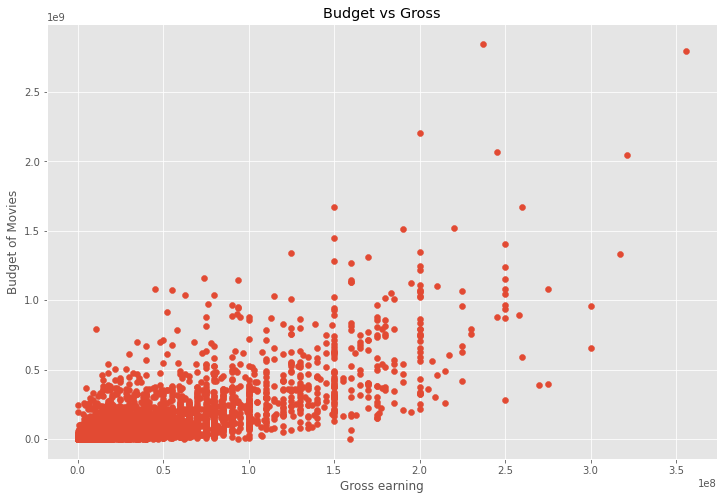

In [218]:
# Find correlation of the fields vs Gross
# Scatter plot using Matplotlib

plt.scatter(x=df['budget'], y = df['gross'])
plt.title('Budget vs Gross')

plt.xlabel('Gross earning')
plt.ylabel('Budget of Movies')
plt.show()

[Text(0.5, 1.0, 'Budget vs Gross'),
 Text(0.5, 0, 'Budget of Movies'),
 Text(0, 0.5, 'Gross Earning')]

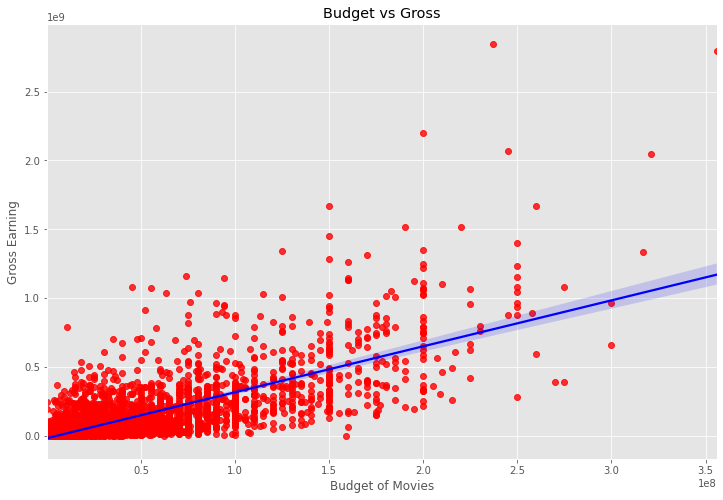

In [199]:
# Using Seaborn regplot for Plotting Budget vs Gross

plot_viz = sns.regplot(x='budget', y='gross', 
            data = df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

plot_viz.set(title ="Budget vs Gross",xlabel = "Budget of Movies", ylabel = "Gross Earning",)



In [219]:
# Look at the correlation 

df.corr(method = 'pearson') # pearson, kendall, spearman

# High correlation between 'budget vs gross' and 'votes vs gross'

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


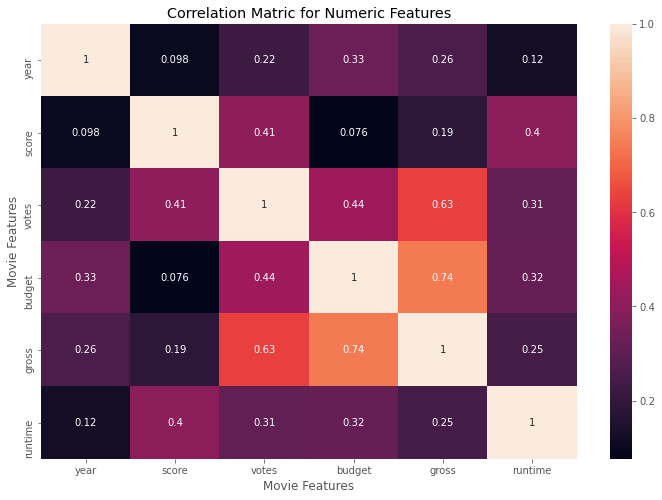

In [205]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [220]:
# check field data type
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [241]:
df_numerize = df

for col_name in df_numerize.columns:
    if(df_numerize[col_name].dtype == 'object'):
        df_numerize[col_name] = df_numerize[col_name].astype('category')
        df_numerize[col_name] = df_numerize[col_name].cat.codes
df_numerize.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [5]:
# Look and compare the original table with the numerized table
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year_fixed
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


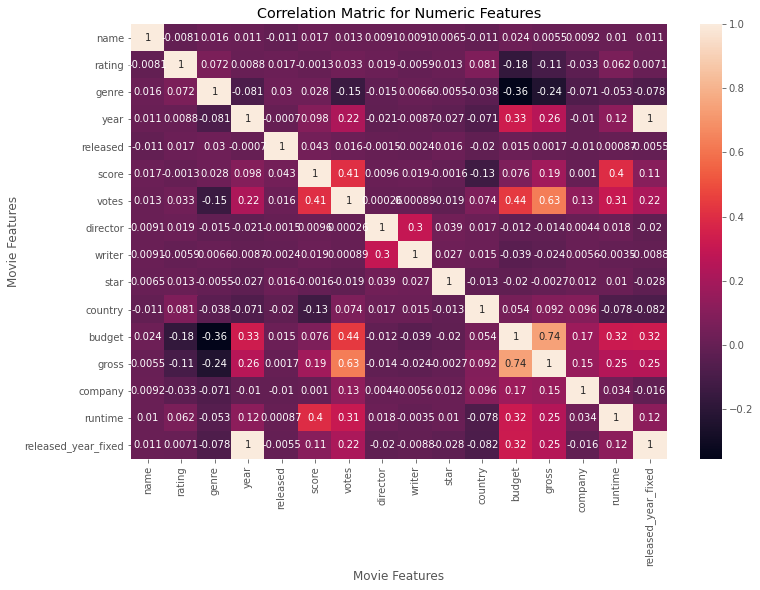

In [222]:
correlation_matrix = df_numerize.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [225]:
# Look at the the matrix in table
df_numerize.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year_fixed
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,0.011134
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.007054
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.077550
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,0.997295
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,-0.005455
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.105601
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.218364
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.020439
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.008807
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.027576


In [226]:
# Look at them in pair

correlation_mat = df_numerize.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name                 name                   1.000000
                     rating                -0.008069
                     genre                  0.016355
                     year                   0.011453
                     released              -0.011311
                     score                  0.017097
                     votes                  0.013088
                     director               0.009079
                     writer                 0.009081
                     star                   0.006472
                     country               -0.010737
                     budget                 0.023970
                     gross                  0.005533
                     company                0.009211
                     runtime                0.010392
                     released_year_fixed    0.011134
rating               name                  -0.008069
                     rating                 1.000000
                     genre                  0.

In [242]:
# Pair up and sort
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

budget  genre    -0.356564
genre   budget   -0.356564
        gross    -0.235650
gross   genre    -0.235650
rating  budget   -0.176002
dtype: float64

In [239]:
# High correlation

high_corr = sorted_pairs[(sorted_pairs)>0.5]
# print(high_corr)
high_corr = high_corr[(high_corr)<0.9] #exclude features prefer to itself and year vs released_year_fixed
print(high_corr)

#------- Some conclusion-----

#  ----> Votes and Budget have highest correlation with Gross of a movie
#  ----> Company, star, genre has low correlation with Gross

gross   votes     0.630757
votes   gross     0.630757
gross   budget    0.740395
budget  gross     0.740395
dtype: float64
